# Customer value analysis

The goal of this post is to analyse a dataset and provide some useful information regarding customers demographics and buying behaviour.  I choose to qork on a dataset from IBM Watson Analytics (available [here](https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/)). I will provide answers to assigned questions by visualization methods in Python. This dataset will show us the most profitable customers and how they interact. I will show you how you can increase profitable customer response, retention and growth. let's start!



In [1]:
import pandas as pd
import numpy as np
import os
# Load the raw data using the read_csv object
df = pd.read_csv("WA_Fn_UseC__Marketing_Customer_Value_Analysis.csv")

## Introduction to dataset

There were a total of 24 variables in this dataset . The variables and the description of the values are as follows
1. Customer: The customer ID number
2. State
3. Customer lifetime value: CLV present the finantial value of a customer. It is a prediction of the net profit attributed to the customer during his/her entire relationship with the company. CLV is highly important in shaping managers’ decisions. 
4. Reponse: Yes or no response
5. Coverage: Coverage type eigher basic, Premium, or extended
6. Education
7. Effective to Date
8. Employmnet status
9. Employed or unemployed
10. Gender: F or M
11. Income
12. Location Code
13. Marital Status
14. Monthly Premium Auto
15. Months Since Policy inception
16. Number of Open Complaints
17. Number of Polices
18. Policy Type
19. Policy
20. Renew Offer Type
21. Sales Channel
22. Total Claim Amount
23. Vehicle Class
24. Vehicle Size


In [2]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# the size or structure of the dataset: 24 columns and over 9000 rows. 
df.shape

(9134, 24)

Dataset comprises of 9134 observations and 24 characteristics.

## investigating the dataset
First, I will get some basic information regarding this dataset.

In [111]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

The data look clean since there is no NaN value in our feature culumns. The data types have been also properly set. 

In [112]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float32
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## Exploring the features
Now lets build up some graphs to explore the features (variables).

In [36]:
import seaborn as sb
import scipy
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from IPython.display import display
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
sb.set()
import pylab as pl
from pylab import rcParams
from matplotlib import cm
import plotly.graph_objs as go
import plotly.offline as py
import os
import plotly.tools as tls
import plotly.figure_factory as ff
import matplotlib.ticker as mtick

%matplotlib inline
#rcParams['figure.figsize'] = 28, 4
sb.set_style('whitegrid')

In [37]:
df["Vehicle Class"].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [38]:
df["Education"].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [39]:
df["Coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [40]:
df["State"].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [41]:
df["Customer Lifetime Value"].mean()

8004.93017578125

The describe() function in pandas is useful in getting various statistics. As shown below, this function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the dataset. We can see that a notably large difference between 75% tile and max values of most of our features. this implys that we have some Outliers in our data set.

In [42]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.930176,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.965820,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007690,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251831,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182129,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.166992,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.382812,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Data visualization
This was just a glimpse of this dataset. Let’s use visualization methods in Python and explore data with some  graphs. Python's Seaborn library, built on top of matplotlib, will be used to get statistical graphs in order to perform Univariate and Multivariate analysis.

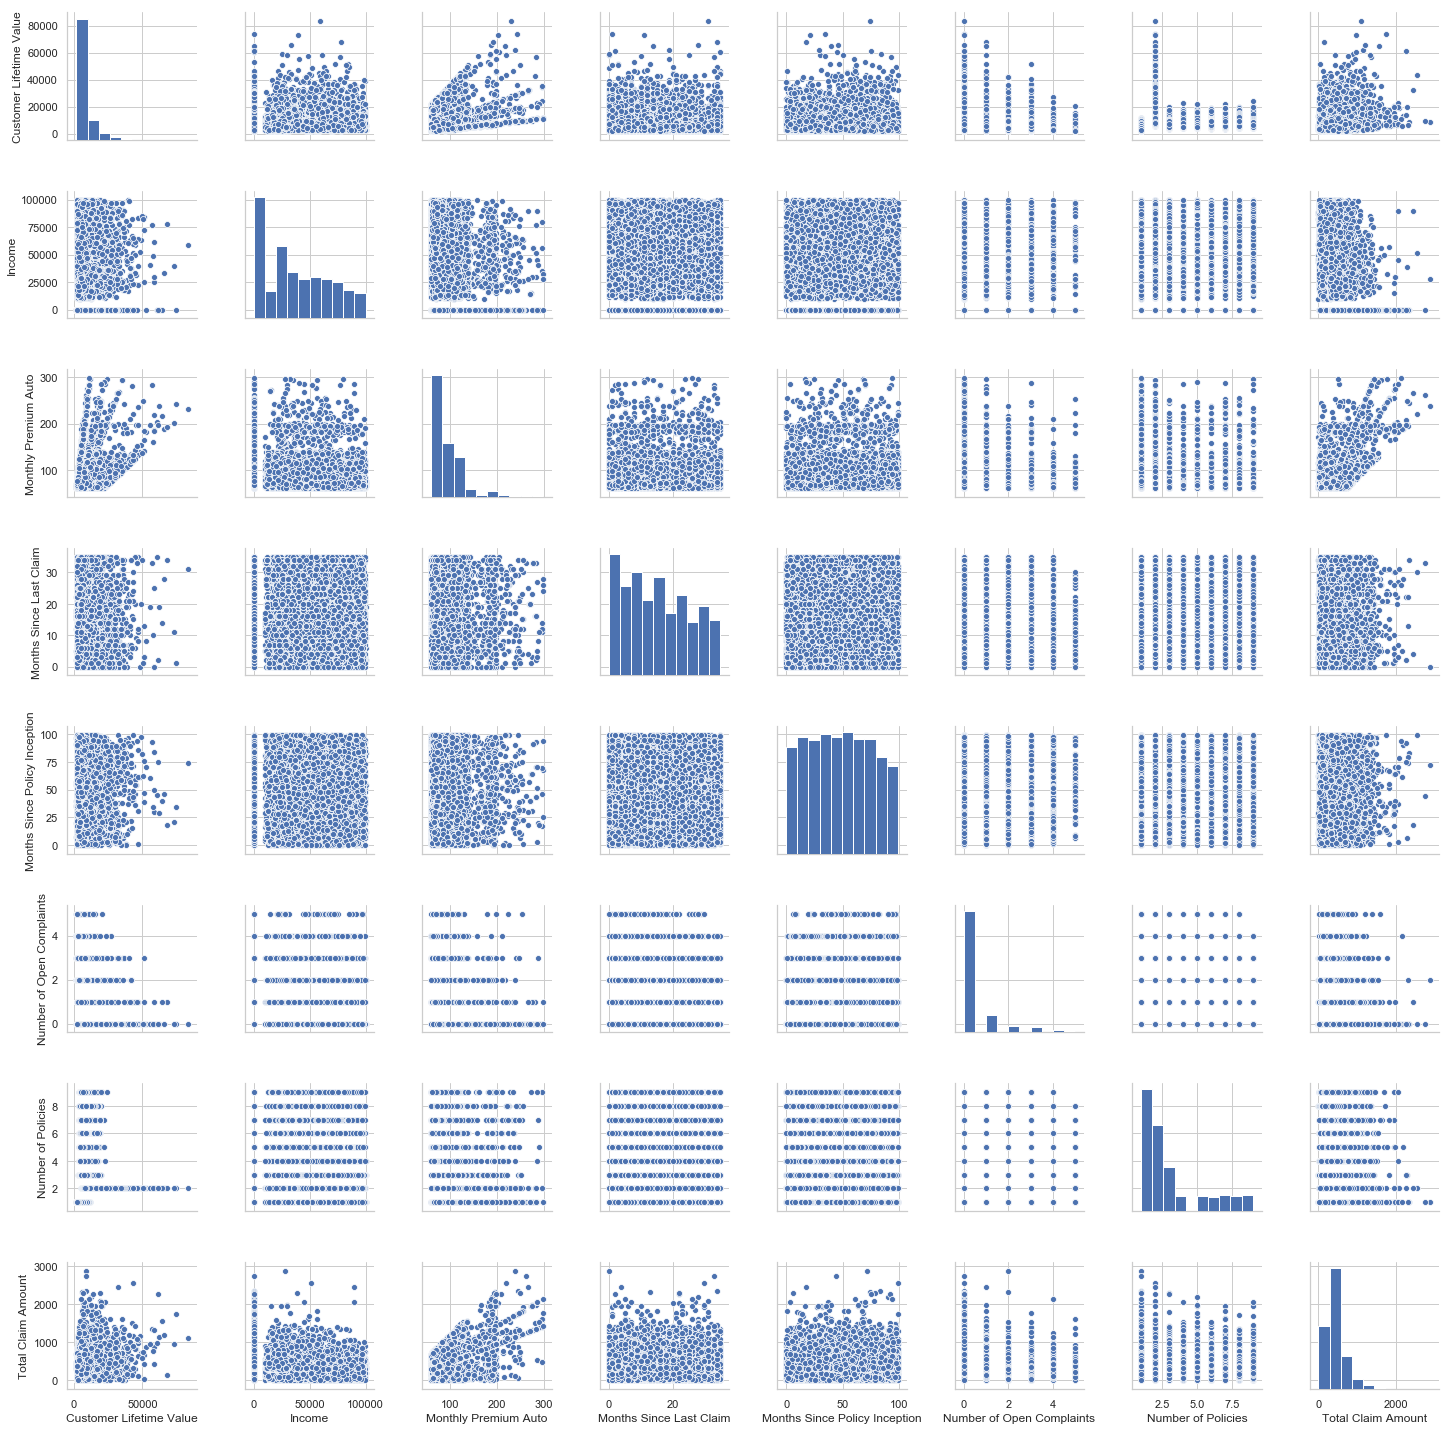

In [43]:
sb.pairplot(df)

In [44]:
df.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


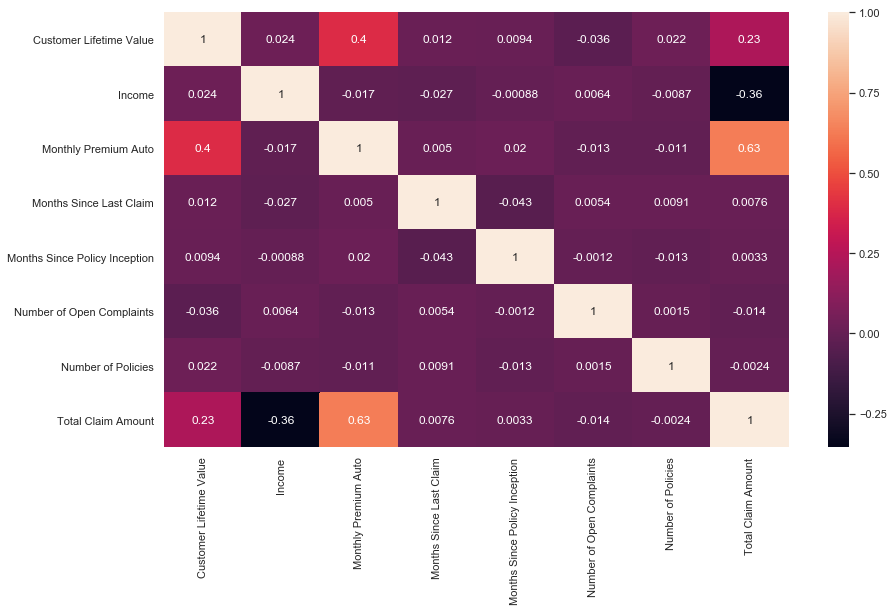

In [108]:
sb.heatmap(df.corr(), xticklabels=df.corr().columns.values, yticklabels=df.corr().columns.values, annot=True)

In [46]:
spearmanr(df["Customer Lifetime Value"], df["Total Claim Amount"])

SpearmanrResult(correlation=0.2105979582520612, pvalue=4.351847002636142e-92)

In [47]:
chi2_contingency

<function scipy.stats.contingency.chi2_contingency>

In [48]:
table = pd.crosstab(df.Gender,df["EmploymentStatus"])

In [49]:
table

EmploymentStatus,Disabled,Employed,Medical Leave,Retired,Unemployed
Gender,,,,,
F,244,2937,214,128,1135
M,161,2761,218,154,1182


In [161]:
chi2, p, dof, expected = chi2_contingency(table.values)

In [162]:
rcParams['figure.figsize'] = 14, 5
gb = df.groupby("Gender")["Education"].value_counts().to_frame().rename({"Education": "Numbers"}, axis = 1).reset_index()


In [163]:
gb

,Gender,Education,Numbers
0,F,Bachelor,1423
1,F,College,1352
2,F,High School or Below,1321
3,F,Master,393
4,F,Doctor,169
5,M,College,1329
6,M,Bachelor,1325
7,M,High School or Below,1301
8,M,Master,348
9,M,Doctor,173


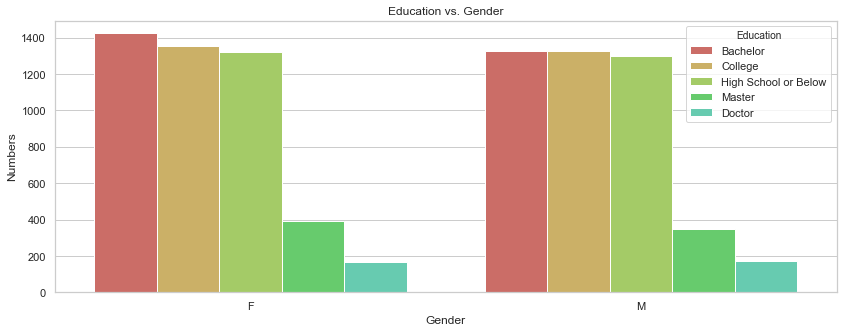

In [164]:
sb.barplot(x = "Gender", y = "Numbers", data = gb, hue = "Education", palette = sb.color_palette("hls", 9)).set_title("Education vs. Gender");

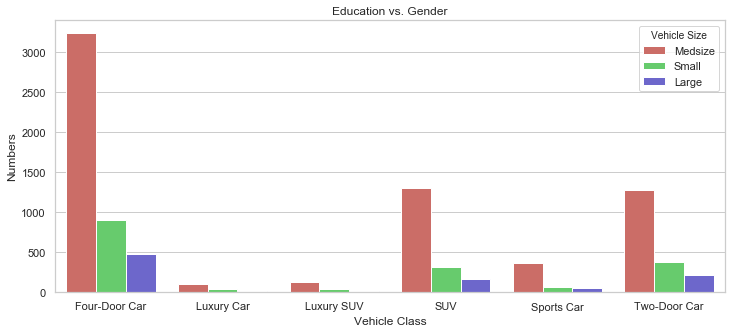

In [153]:
rcParams['figure.figsize'] = 12, 5
gb = df.groupby("Vehicle Class")["Vehicle Size"].value_counts().to_frame().rename({"Vehicle Size": "Numbers"}, axis = 1).reset_index()
sb.barplot(x = "Vehicle Class", y = "Numbers", data = gb, hue = "Vehicle Size", palette = sb.color_palette("hls", 3)).set_title("Education vs. Gender");


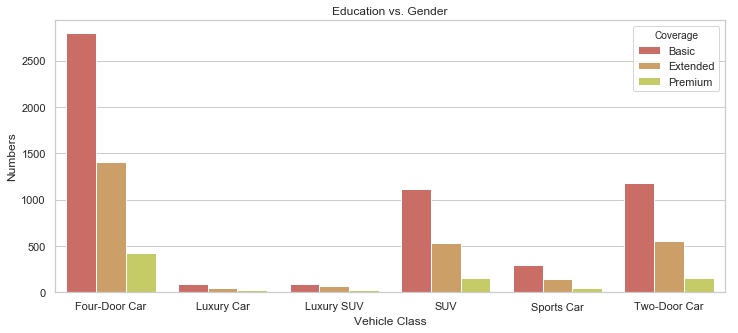

In [155]:
rcParams['figure.figsize'] = 12, 5
gb = df.groupby("Vehicle Class")["Coverage"].value_counts().to_frame().rename({"Coverage": "Numbers"}, axis = 1).reset_index()
sb.barplot(x = "Vehicle Class", y = "Numbers", data = gb, hue = "Coverage", palette = sb.color_palette("hls", 12)).set_title("Education vs. Gender");


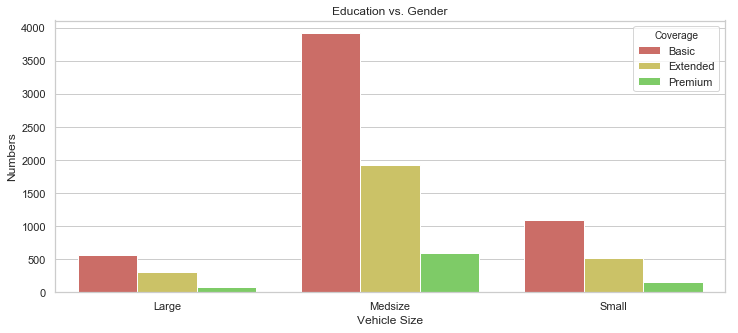

In [168]:
rcParams['figure.figsize'] = 12, 5
gb = df.groupby("Vehicle Size")["Coverage"].value_counts().to_frame().rename({"Coverage": "Numbers"}, axis = 1).reset_index()
sb.barplot(x = "Vehicle Size", y = "Numbers", data = gb, hue = "Coverage", palette = sb.color_palette("hls", 7)).set_title("Education vs. Gender");


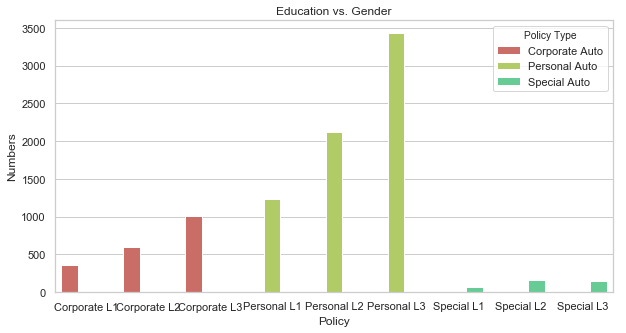

In [57]:
rcParams['figure.figsize'] = 10, 5
gb = df.groupby("Policy")["Policy Type"].value_counts().to_frame().rename({"Policy Type": "Numbers"}, axis = 1).reset_index()
sb.barplot(x = "Policy", y = "Numbers", data = gb, hue = "Policy Type", palette = sb.color_palette("hls", 5)).set_title("Education vs. Gender");


In [59]:
gb = df.groupby("State").agg({"Customer Lifetime Value":'mean'}).rename({"Customer Lifetime Value": "Customer Lifetime Value Mean"}, axis = 1).reset_index()

In [60]:
gb

,State,Customer Lifetime Value Mean
0,Arizona,7861.341309
1,California,8003.647949
2,Nevada,8056.707031
3,Oregon,8077.901367
4,Washington,8021.472168


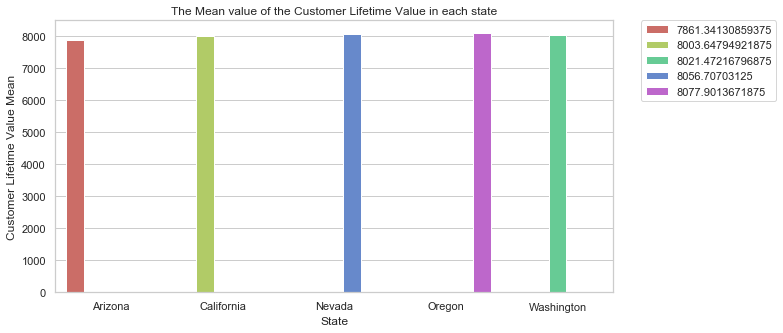

In [61]:

sb.set(style="whitegrid")
sb.barplot(x = "State", y = "Customer Lifetime Value Mean", data = gb, hue = "Customer Lifetime Value Mean" , palette = sb.color_palette("hls", 5)).set_title("The Mean value of the Customer Lifetime Value in each state");
#plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


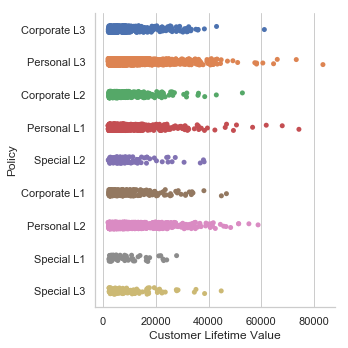

In [62]:
sb.catplot(x="Customer Lifetime Value",y="Policy",data=df)

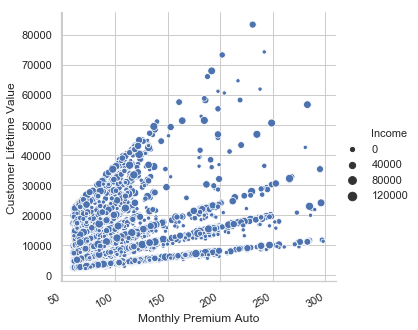

In [79]:
g = sb.relplot(x="Monthly Premium Auto", y="Customer Lifetime Value",size='Income', kind="scatter", data=df)
g.fig.autofmt_xdate()

In [64]:
df["Customer Lifetime Value"]=df["Customer Lifetime Value"].astype('float32')

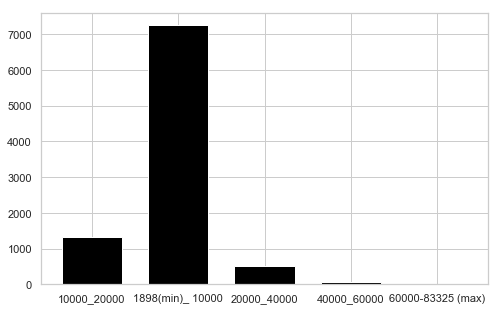

In [123]:

CLVunder10000 = df["Customer Lifetime Value"][(df["Customer Lifetime Value"] <= 10000.0)]
CLV10000_20000 = df["Customer Lifetime Value"][(df["Customer Lifetime Value"] <= 20000.0) & (df["Customer Lifetime Value"] >= 10000.1)]
CLV20000_40000 = df["Customer Lifetime Value"][(df["Customer Lifetime Value"] <= 40000.0) & (df["Customer Lifetime Value"] >= 20000.1)]
CLV40000_60000 = df["Customer Lifetime Value"][(df["Customer Lifetime Value"] <= 60000.0) & (df["Customer Lifetime Value"] >= 40000.1)]
CLVabove60000 = df["Customer Lifetime Value"][df["Customer Lifetime Value"] >= 60000.1]

CLV_range = ["1898(min)_ 10000","10000_20000","20000_40000","40000_60000","60000-83325 (max)"]
CLV_count = [len(CLVunder10000.values),len(CLV10000_20000.values),len(CLV20000_40000.values),len(CLV40000_60000.values),len(CLVabove60000.values)]

plt.figure(figsize=(8,5))
plt.bar(CLV_range, CLV_count, width=0.7, color = "black", align='center')
plt.show()

In [66]:
CLV_count

[7248, 1311, 515, 51, 9]

In [67]:
df["Customer Lifetime Value"].describe()

count     9134.000000
mean      8004.930176
std       6870.965820
min       1898.007690
25%       3994.251831
50%       5780.182129
75%       8962.166992
max      83325.382812
Name: Customer Lifetime Value, dtype: float64

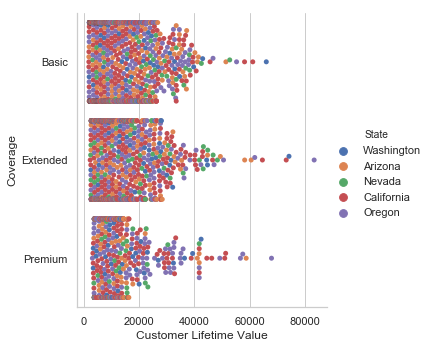

In [81]:
sb.catplot(x="Customer Lifetime Value", y="Coverage", hue="State", kind="swarm", data=df);

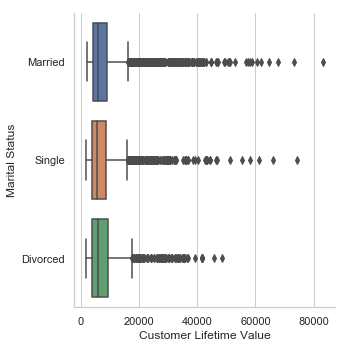

In [101]:
sb.catplot(x="Customer Lifetime Value",y="Marital Status",kind='box',data=df)

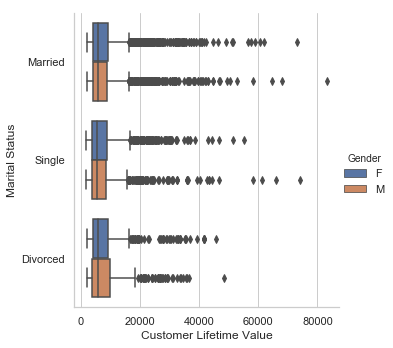

In [102]:
sb.catplot(x="Customer Lifetime Value",y="Marital Status", hue = "Gender", kind='box',data=df)

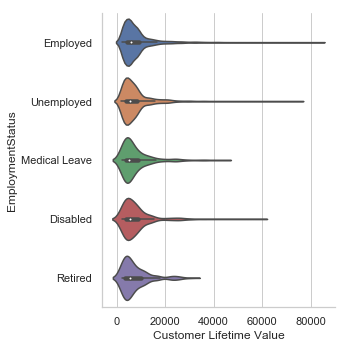

In [103]:
sb.catplot(x="Customer Lifetime Value",y="EmploymentStatus",kind='violin',data=df)

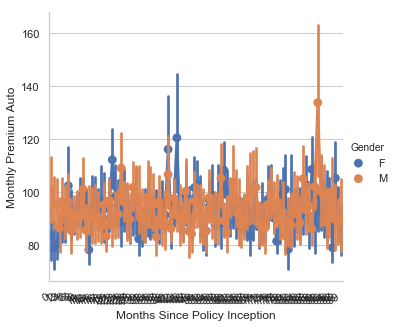

In [104]:
rcParams['figure.figsize'] = 14, 8
ax = sb.catplot(y='Monthly Premium Auto',x='Months Since Policy Inception',hue='Gender',kind='point',data=df)
ax.fig.autofmt_xdate()
ax.

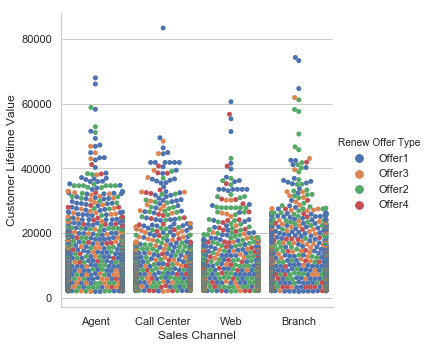

In [107]:
sb.catplot(x="Sales Channel", y="Customer Lifetime Value", hue="Renew Offer Type", kind="swarm", data=df);

In [125]:
df2=df[['Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Customer Lifetime Value', 'Income', 'Total Claim Amount' ]]

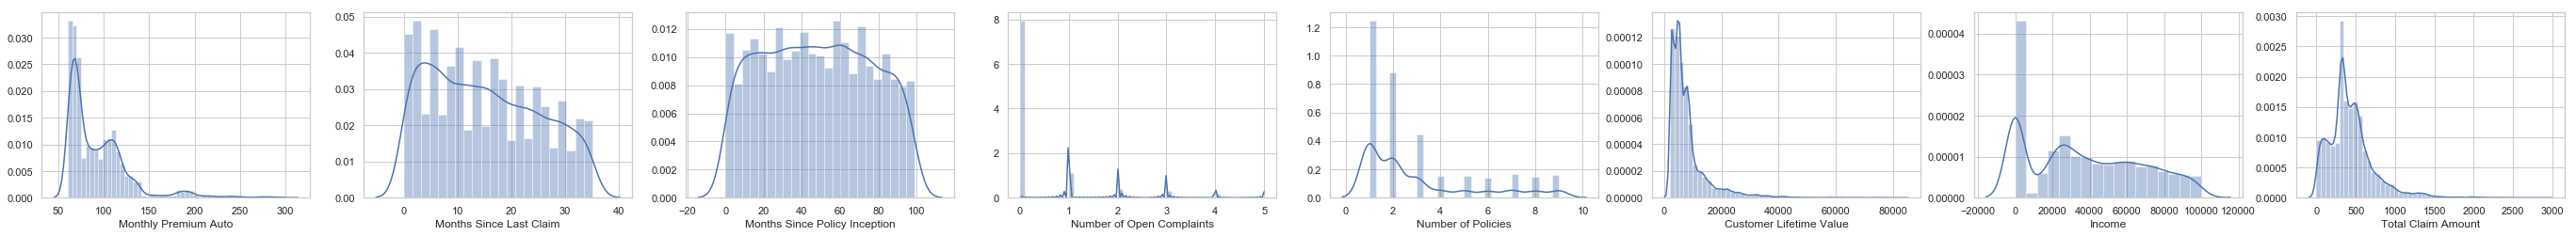

In [147]:
number_of_rows=1
number_of_columns=8
l = df2.columns.values
plt.figure(figsize=(6*number_of_columns,8*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sb.distplot(df[l[i]],kde=True) 

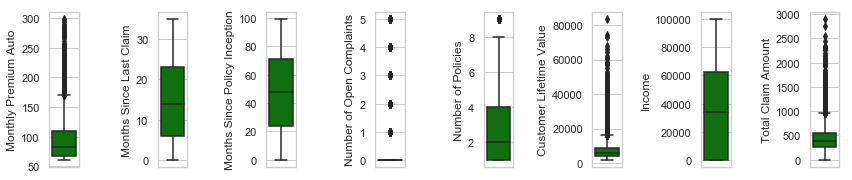

In [171]:
l = df2.columns.values
number_of_columns=8
number_of_rows = 1
plt.figure()
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sb.set_style('whitegrid')
    sb.boxplot(df2[l[i]],color='green',orient='v')
    plt.tight_layout()